In [33]:
################

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
from sklearn.pipeline import make_pipeline

In [5]:
# rng = np.random.RandomState(1)
# x = 10 * rng.rand(50)
# y = np.sin(x) + 0.1 * rng.randn(50)

In [6]:
df = pd.read_csv('input_data.csv',skiprows = [0, 1]).sort_values(by="x")
df

x    y
9  12  270
0  13  520
1  13  550
7  14  300
2  15  600
3  15  610
4  16  620
5  21  724
6  21  680
8  40  962

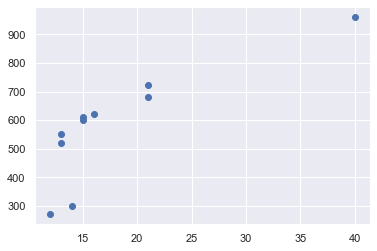

In [7]:
x = np.array(df['x'])
y = np.array(df['y'])

plt.scatter(x, y)

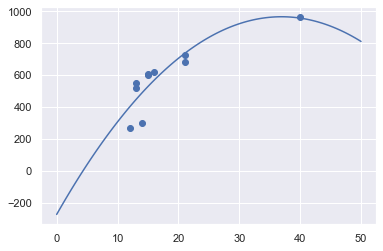

In [8]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 50, 100)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [9]:
# coefficient of determination calculation - variant 1
from sklearn.metrics import r2_score
r_var1 = r2_score(y, poly_model.predict(x[:, np.newaxis]))
print("coefficient of determination [calculation var 1] =", r_var1)

# coefficient of determination calculation - variant 2
sst = np.square(y - y.mean())
ssr = np.square(poly_model.predict(x[:, np.newaxis]) - y.mean())
r_var2 = ssr.sum() / sst.sum() # коэффициент детерминации
print("coefficient of determination [calculation var 2] =", r_var2)

coefficient of determination [calculation var 1] = 0.7583645621017832
coefficient of determination [calculation var 2] = 0.7583645621017884


In [ ]:
1: 0.678218373963516
2: 0.7583645621018019
3: 0.7952089594773007
4: 0.7962304182995691
5: 0.8326483578261767
6: 0.9958137860375181
7: 0.9959043211839788
8: 0.9959043630063333

In [45]:
poly_model.predict([[50]])

array([-2.00686705e+08])